Atividade Prática 06 - Análise de Incertezas em dados LIDAR
---
Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select restart and run all.

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE".

Colored Bar

Lidar Data Compared to Ground Measurements: Understanding Uncertainty
This week you will work with lidar data again! This time you will explore the values in a lidar dataset - specifically tree height from a canopy height model. You will compare these measurements to the same types of measurements made by humans in the field. You will use all of the raster and vector spatial data skills that you have gained so far this semester, combined with some pandas skills, to complete this assignment.

The data that you will use for this week is available here. Or you can download it from earthpy using:

et.data.get_data('spatial-vector-lidar')

For both the SJER and SOAP field sites, create scatterplots (with regression and 1:1 lines) that compare:

MAXIMUM canopy height model height in meters, extracted within a 20 meter radius, compared to MAXIMUM tree
height derived from the insitu field site data.

MEAN canopy height model height in meters, extracted within a 20 meter radius, compared to MEAN tree height derived from the insitu field site data.
Create one figure for each site with two subplots (ax1, ax2): one for the Max comparison and one for the Mean comparison.

IMPORTANT: For All Plots
Place lidar data values on the X axis and human measured tree height on the Y axis.
Include a calculated regression line (HINT: use sns.regplot() to achieve this line) that describes the relationship of lidar of the data.
Include a separate 1:1 line that can be used to compare the regression fit to a perfect 1:1 fit.
Set the x and y limits to be the SAME for each individual plot. (e.g. for plot 3, the x and y limits are set to the same range).
Label x and y axes appropriately - include units.
Add a title to your plot that describes what the plot shows.
Ensure that your notebook is fully reproducible. This means you will:
Create reproducible paths using the os module
Download the data using code in the notebook: NOTE: the et.get_data function will not download the data again if you already have it so it's safe to add without worry of slowing down your notebook!!

In [1]:
# Import required libraries here
# RUN - no questions asked!
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

import os
os.chdir('spatialindex-src-1.8.5')

!./configure
!make
!make install

!pip install rtree
!ldconfig
!pip install geopandas
!pip install rioxarray
!pip install earthpy
!pip install rasterstats
!pip install rasterio
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.ma as ma
import pandas as pd
import rioxarray as rxr
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import rasterio as rasterio

# Set consistent plotting style
sns.set_style("white")
sns.set(font_scale=1.5)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1059k      0 --:--:-- --:--:-- --:--:-- 1059k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [2]:
#Agora fazer o diretório para importar os dados
from google.colab import drive
drive.mount('/content/drive')
# your path preffix
my_path = '/content/drive/MyDrive/dados_gis'
my_path


Mounted at /content/drive


'/content/drive/MyDrive/dados_gis'

In [3]:
#Negocio aqui eu demorei muito tempo pq no exercicio não manda usar o TIF, mas não tem como fazer sem,
#por causa disso eu vou usar
# Load & plot the data
sjer_lidar_chm_path = os.path.join("/california",
                                   "neon-sjer-site",
                                   "2013",
                                   "lidar",
                                   "SJER_lidarCHM.tif")

# open data
sjer_chm_data = rxr.open_rasterio(my_path + sjer_lidar_chm_path,
                                  masked = True).squeeze()


Mean: 1.9355862
Max: 45.879997
Min: 0.0
Mean: 8.213505
Max: 45.879997
Min: 2.0


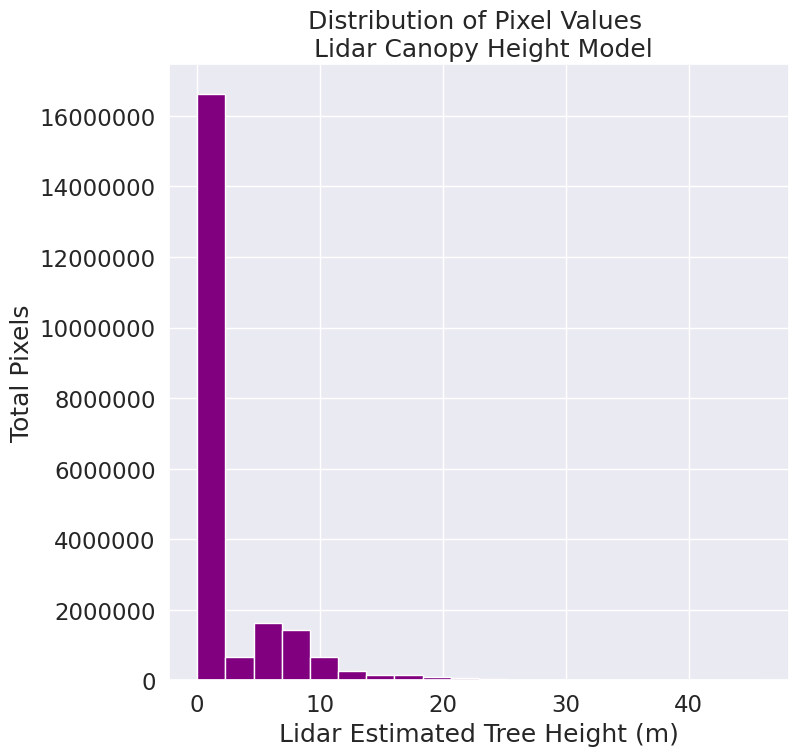

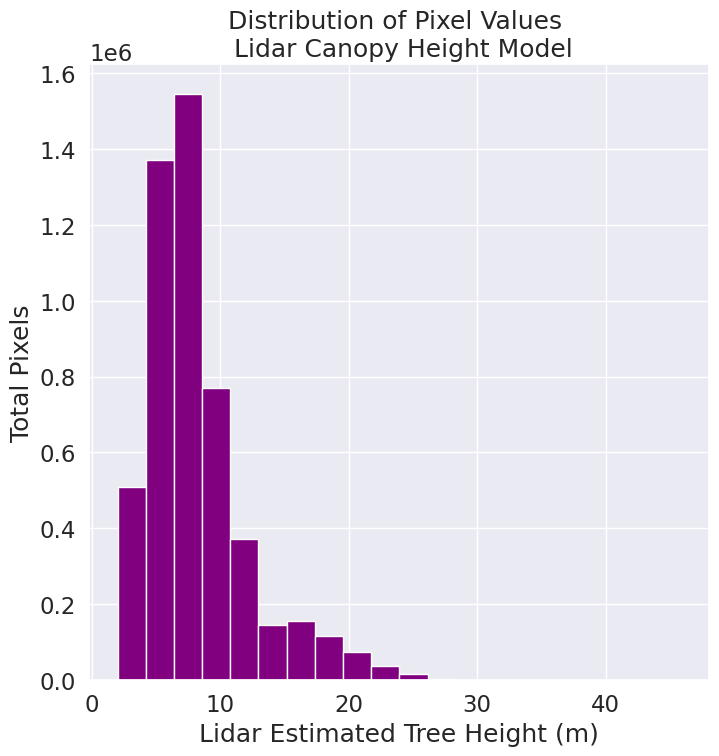

In [4]:
# Load & plot the data
sjer_lidar_chm_path = os.path.join("/california",
                                   "neon-sjer-site",
                                   "2013",
                                   "lidar",
                                   "SJER_lidarCHM.tif")

# open data
sjer_chm_data = rxr.open_rasterio(my_path + sjer_lidar_chm_path,
                                  masked = True).squeeze()
type(sjer_chm_data)
# Explore the data by plotting a histogram with earthpy
ax = ep.hist(sjer_chm_data.values,
             figsize=(8, 8),
             colors="purple",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation
ax[1].ticklabel_format(useOffset=False,
                       style='plain')
# EXPLORE: View summary statistics of canopy height model
# Notice the mean value with 0's included in the data
print('Mean:', sjer_chm_data.mean().values)
print('Max:', sjer_chm_data.max().values)
print('Min:', sjer_chm_data.min().values)
# CLEANUP: Set CHM values of 0 to NAN (no data or not a number)
sjer_chm_data_no_zeros = sjer_chm_data.where(sjer_chm_data != 0, np.nan)

# View summary statistics of canopy height model after cleaning up the data
print('Mean:', sjer_chm_data_no_zeros.mean().values)
print('Max:', sjer_chm_data_no_zeros.max().values)
print('Min:', sjer_chm_data_no_zeros.min().values)
# Explore the data by plotting a histogram with earthpy
ax = ep.hist(sjer_chm_data_no_zeros.values,
             figsize=(8, 8),
             colors="purple",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")



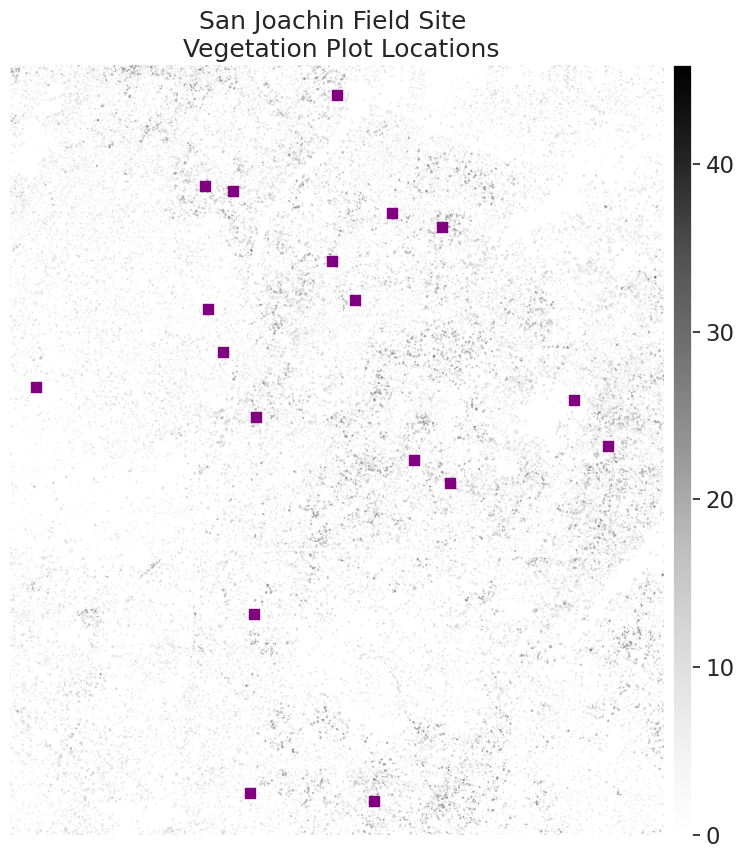

,geometry,Plot_ID,Point,northing,easting,plot_type,min,max,mean,count,median
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,2.04,19.049999,11.544347,161,12.62
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,2.10,24.019999,10.369277,443,7.87
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,2.82,16.070000,7.518398,643,6.80
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,3.24,11.059999,7.675346,245,7.93
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,3.38,5.740000,4.591177,17,4.45


In [5]:
# Turn off scientific notation
ax[1].ticklabel_format(useOffset=False,
                       style='plain')
sjer_centroids_path = os.path.join("/california",
                                   "neon-sjer-site",
                                   "vector_data",
                                   "SJER_plot_centroids.shp")

# load file
sjer_centroids_points = gpd.read_file(my_path + sjer_centroids_path)

# print type
type(sjer_centroids_points)
# Ensure this is a points layer as you think it is
sjer_centroids_points.geom_type.head()
fig, ax = plt.subplots(figsize=(10, 10))

# We plot with the zeros in the data so the CHM can be better represented visually
ep.plot_bands(sjer_chm_data,
              extent = plotting_extent(sjer_chm_data,
                                       sjer_chm_data.rio.transform()), # Set spatial extent
              cmap='Greys',
              title="San Joachin Field Site \n Vegetation Plot Locations",
              scale=False,
              ax=ax)

sjer_centroids_points.plot(ax=ax,
                          marker='s',
                          markersize=45,
                          color='purple')
ax.set_axis_off()
plt.show()
# Create a buffered polygon layer from your plot location points
sjer_plots_poly = sjer_centroids_points.copy()

# Buffer each point using a 20 meter circle radius
# and replace the point geometry with the new buffered geometry
sjer_plots_poly['geometry'] = sjer_centroids_points.geometry.buffer(20)
sjer_plots_poly.head()
# If the dir does not exist, create it
output_path = my_path + "/outputs"

if not os.path.isdir(output_path):
    os.mkdir(output_path)

# Export the buffered point layer as a shapefile to use in zonal stats
plot_buffer_path = os.path.join(output_path,
                                "plot_buffer.shp")

# save to file
sjer_plots_poly.to_file(plot_buffer_path)
# Rasterstats contains the zonalstatistics function
# that you will use to extract raster values
import rasterstats as rs
# Extract zonal stats
sjer_tree_heights = rs.zonal_stats(plot_buffer_path,
                                   sjer_chm_data_no_zeros.values,
                                   nodata=-999,
                                   affine=sjer_chm_data_no_zeros.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   stats="count min mean max median")

# View object type
type(sjer_tree_heights)
# Turn extracted data into a pandas geodataframe
sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)
sjer_lidar_height_df.head()

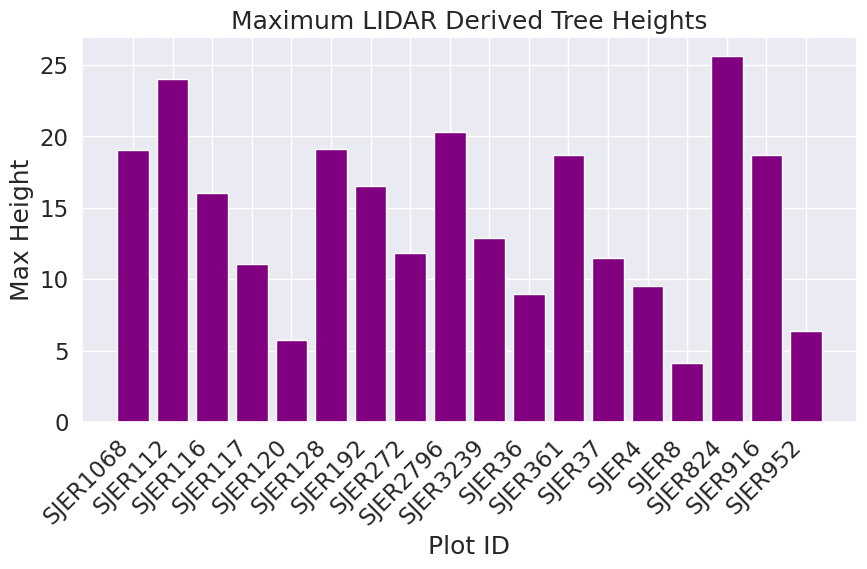

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(sjer_lidar_height_df['Plot_ID'],
       sjer_lidar_height_df['max'],
       color="purple")

ax.set(xlabel='Plot ID',
       ylabel='Max Height',
       title='Maximum LIDAR Derived Tree Heights')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [7]:
# Extract zonal stats but retain the individual pixel values
sjer_tree_heights_ras = rs.zonal_stats(plot_buffer_path,
                                      sjer_chm_data_no_zeros.values,
                                      nodata=-999,
                                      affine=sjer_chm_data_no_zeros.rio.transform(),
                                      geojson_out=True,
                                      raster_out=True,
                                      copy_properties=True,
                                      stats="count min mean max median")

# Convert to geodataframe
sjer_lidar_height_df_ras = gpd.GeoDataFrame.from_features(
    sjer_tree_heights_ras)

# View subset of the dataframe
sjer_lidar_height_df_ras[["Plot_ID",
                          "count",
                          "geometry",
                          "mini_raster_affine",
                          "mini_raster_array"]].head()

,Plot_ID,count,geometry,mini_raster_affine,mini_raster_array
0,SJER1068,161,"POLYGON ((255872.376 4111567.818, 255872.280 4...","(1.0, 0.0, 255832.0, 0.0, -1.0, 4111588.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."
1,SJER112,443,"POLYGON ((257426.967 4111298.971, 257426.871 4...","(1.0, 0.0, 257386.0, 0.0, -1.0, 4111319.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."
2,SJER116,643,"POLYGON ((256858.760 4110819.876, 256858.664 4...","(1.0, 0.0, 256818.0, 0.0, -1.0, 4110840.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."
3,SJER117,245,"POLYGON ((256196.947 4108752.026, 256196.851 4...","(1.0, 0.0, 256156.0, 0.0, -1.0, 4108773.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."
4,SJER120,17,"POLYGON ((255988.372 4110476.079, 255988.276 4...","(1.0, 0.0, 255948.0, 0.0, -1.0, 4110497.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."


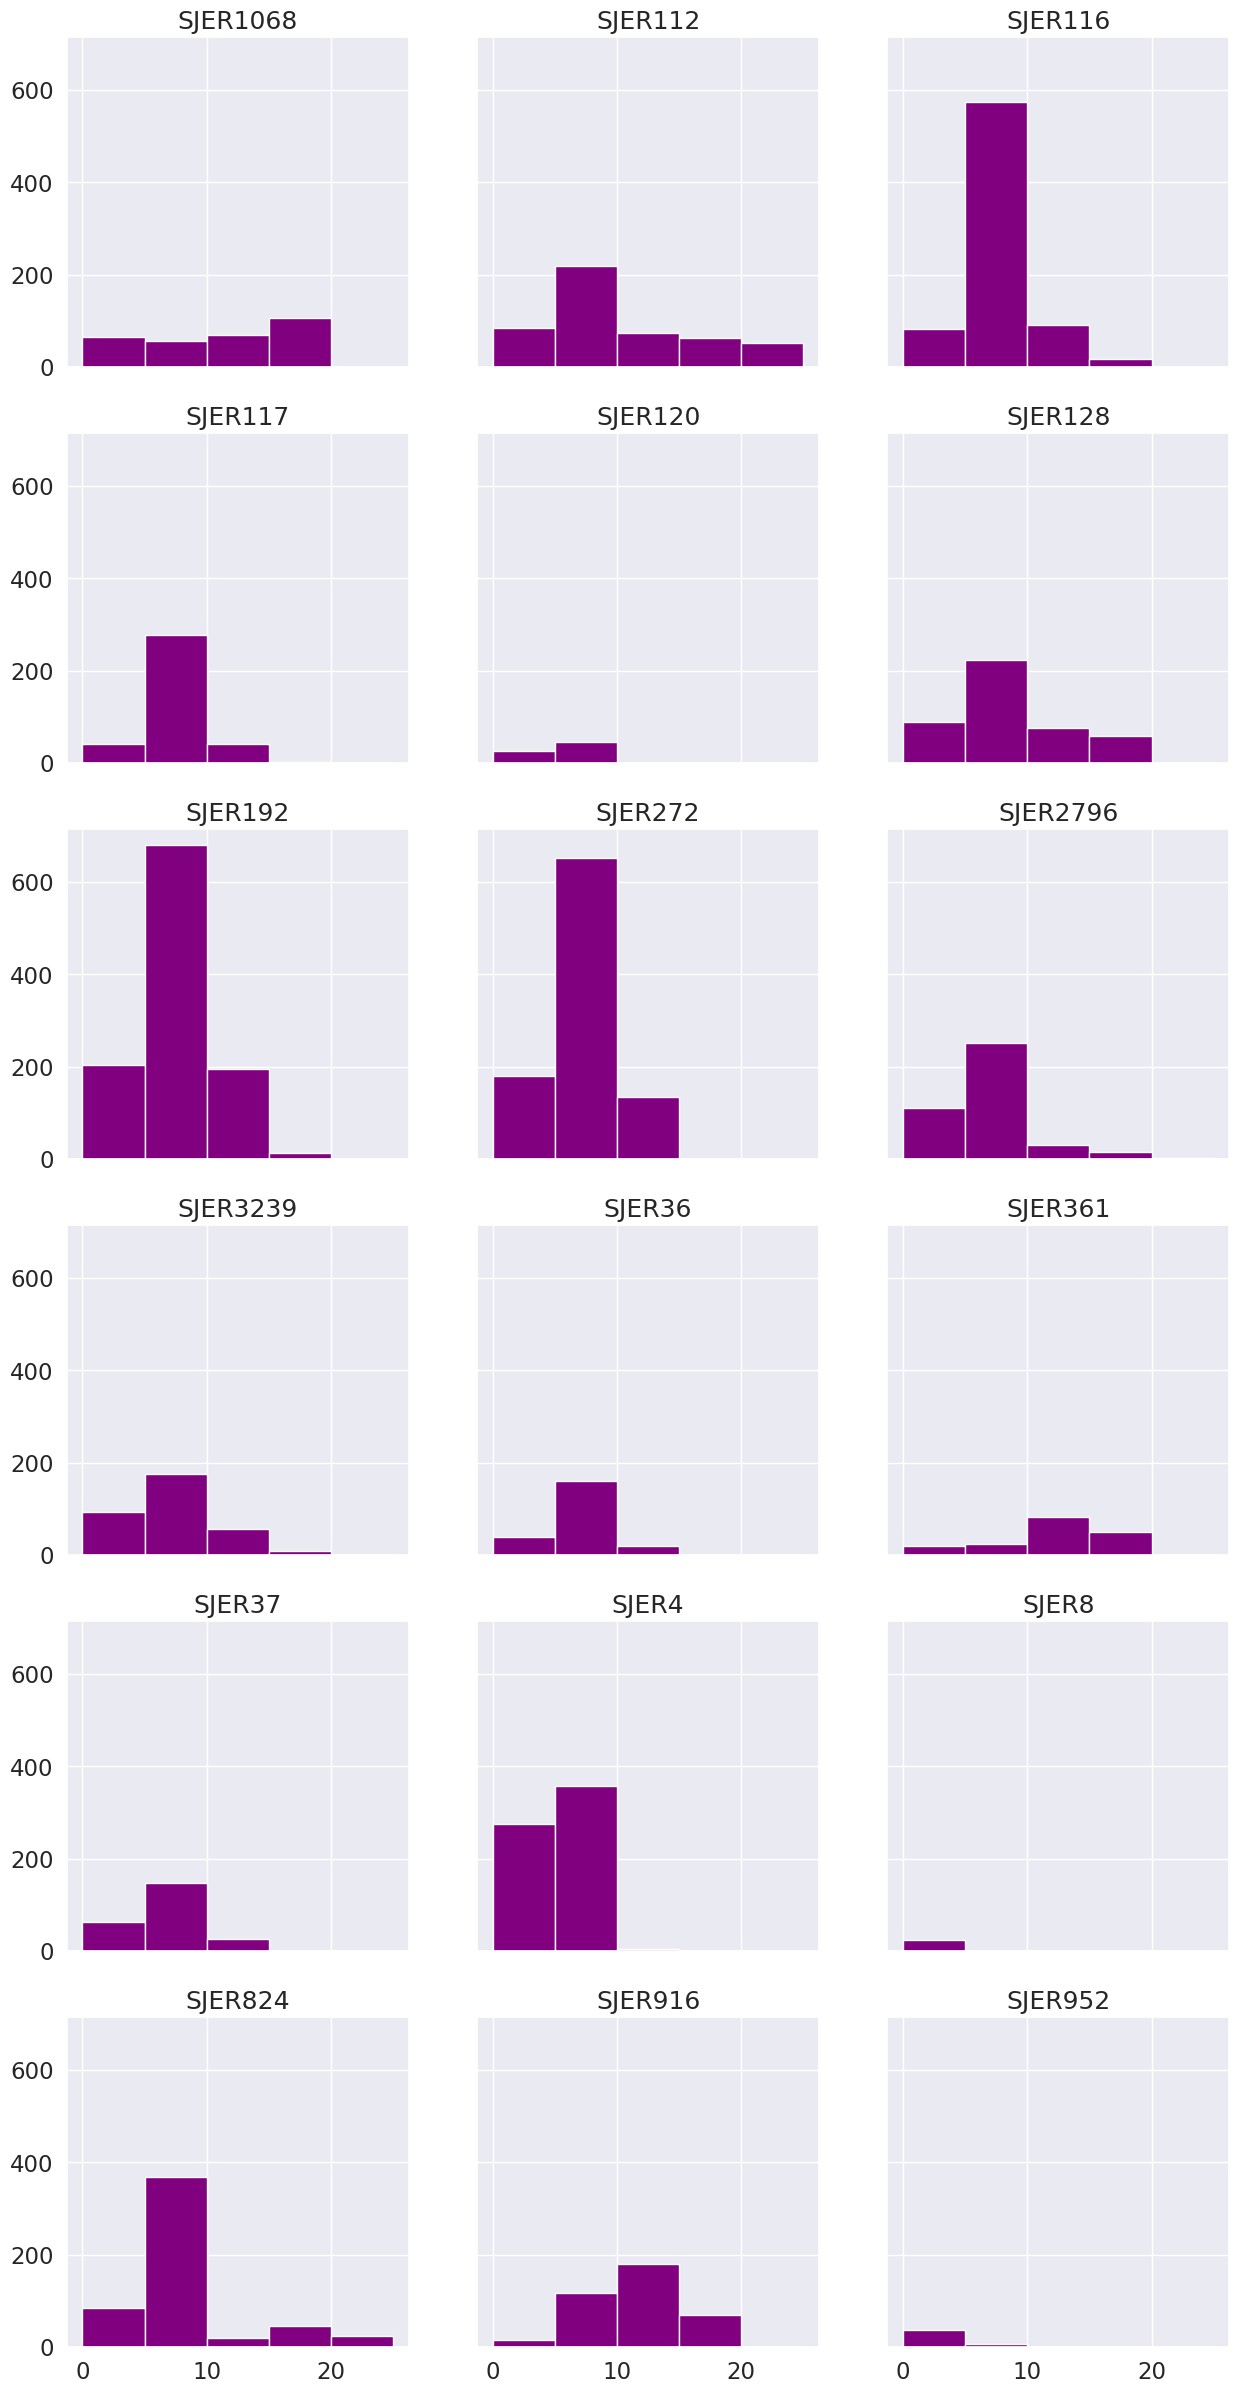

In [8]:
# Get list of sites
site_names = list(sjer_lidar_height_df_ras["Plot_ID"])

# Convert data in dataframe to a numpy array
arr = np.stack(sjer_lidar_height_df_ras["mini_raster_array"])

# Plot using earthpy
ep.hist(arr,
        bins=[0, 5, 10, 15, 20, 25],
        cols = 3,
        title=site_names,
        figsize=(15, 30))

plt.show()


In [9]:
arr.shape
# Extract zonal stats & create geodataframe
sjer_tree_heights = rs.zonal_stats(plot_buffer_path,
                                   sjer_chm_data.values,
                                   affine=sjer_chm_data.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   nodata=0,
                                   stats="count mean max")

# create geodataframe
sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)
# Import & view insitu (field measured) data
path_insitu = os.path.join("/california",
                           "neon-sjer-site",
                           "2013",
                           "insitu",
                           "veg_structure",
                           "D17_2013_SJER_vegStr.csv")

# load data as pandas DataFrame
sjer_insitu_all = pd.read_csv(my_path + path_insitu)

# View columns in data
sjer_insitu_all.columns
sjer_insitu = sjer_insitu_all[["siteid",
                               "sitename",
                               "plotid",
                               "stemheight",
                               "scientificname"]]

sjer_insitu.head()

,siteid,sitename,plotid,stemheight,scientificname
0,SJER,San Joaquin,SJER128,18.2,Pinus sabiniana
1,SJER,San Joaquin,SJER2796,3.3,Arctostaphylos viscida
2,SJER,San Joaquin,SJER272,1.7,Arctostaphylos viscida
3,SJER,San Joaquin,SJER112,2.1,Arctostaphylos viscida
4,SJER,San Joaquin,SJER272,3.0,Arctostaphylos viscida


In [10]:
# summarize data
insitu_stem_ht = sjer_insitu.groupby('plotid').agg(['mean','max'])['stemheight']

# view first lines
insitu_stem_ht.head()
# Rename each column
insitu_stem_ht.rename(columns={'mean': 'insitu_mean',
                               'max': 'insitu_max'},
                      inplace = True)

# view first lines
insitu_stem_ht.head()
# Reset the index (plotid)
insitu_stem_ht = insitu_stem_ht.reset_index()
insitu_stem_ht.head()
# Rename columns so that we know which columns represent lidar values
sjer_lidar_height_df = sjer_lidar_height_df.rename(columns={'max': 'lidar_max',
                                                            'mean': 'lidar_mean',
                                                            'min': 'lidar_min'})

# Join lidar and human measured tree height data
sjer_final_height = sjer_lidar_height_df.merge(insitu_stem_ht,
                                               left_on='Plot_ID',
                                               right_on='plotid')

# view first lines
sjer_final_height.head()

<ipython-input-10-9fef2eb038a1>:2: FutureWarning: ['siteid', 'sitename', 'scientificname'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  insitu_stem_ht = sjer_insitu.groupby('plotid').agg(['mean','max'])['stemheight']


,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean,count,plotid,insitu_mean,insitu_max
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,161,SJER1068,3.866667,19.3
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,443,SJER112,8.221429,23.9
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,643,SJER116,8.218750,16.0
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,245,SJER117,6.512500,11.0
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,17,SJER120,7.600000,8.8


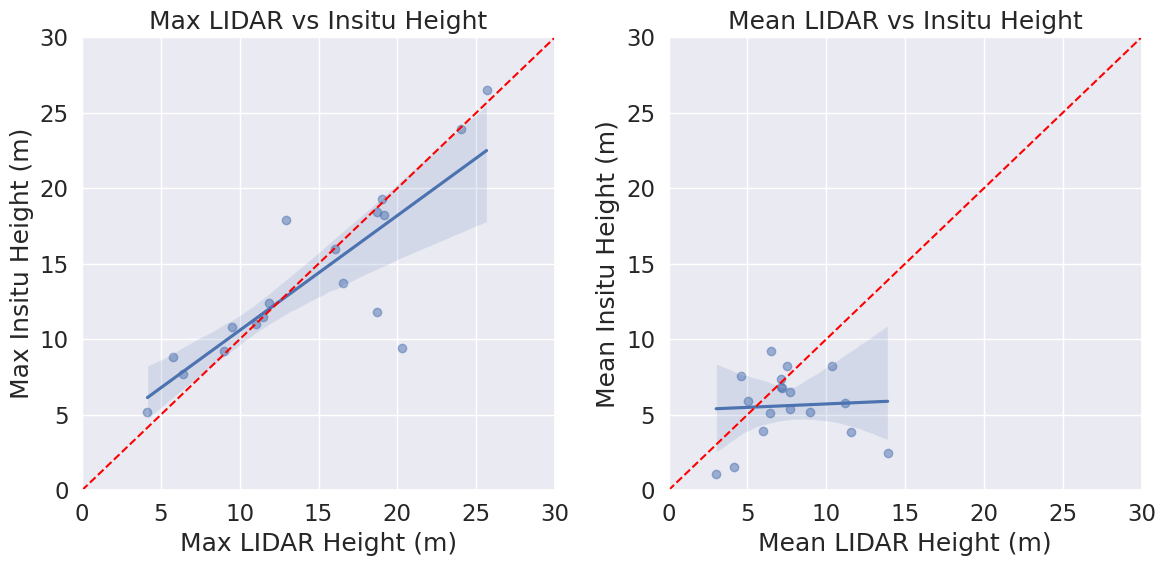

In [11]:
# Criar figura com 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Max lidar vs insitu height
sns.regplot(x=sjer_final_height['lidar_max'], y=sjer_final_height['insitu_max'], ax=ax1, scatter_kws={'alpha': 0.5})
ax1.plot([0, 30], [0, 30], color='red', linestyle='--')
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 30)
ax1.set_xlabel('Max LIDAR Height (m)')
ax1.set_ylabel('Max Insitu Height (m)')
ax1.set_title('Max LIDAR vs Insitu Height')

# Plot 2: Mean lidar vs insitu height
sns.regplot(x=sjer_final_height['lidar_mean'], y=sjer_final_height['insitu_mean'], ax=ax2, scatter_kws={'alpha': 0.5})
ax2.plot([0, 30], [0, 30], color='red', linestyle='--')
ax2.set_xlim(0, 30)
ax2.set_ylim(0, 30)
ax2.set_xlabel('Mean LIDAR Height (m)')
ax2.set_ylabel('Mean Insitu Height (m)')
ax2.set_title('Mean LIDAR vs Insitu Height')

plt.tight_layout()
plt.show()

Question 1 Figure One: SJER mean vs max height -- Plots 1 and 2 Interpretation
In the markdown cell below, answer the following questions:

---
Looking at the plots above, which metric: mean or max height, has a stronger relationship or is closer to a one:one relationship?
List one reason why mean or max (whatever you answered for question 1 above) has a stronger relationship.
You answers can be brief -- a single word or sentence or two is fine.

A média de altura tem um relação mais forte, porque ela considera os valores de altura de várias árvores em uma determinada área, o que pode suavizar as variações individuais e fornecer uma visão mais geral da altura média das árvores.

Figure 2: Plots 3 & 4 - SOAP Lidar vs Insitu Comparison Plots (15 points for each subplot)
You will use the following SOAP data for this figure:
---
spatial-vector-lidar/california/neon-soap-site/2013/insitu/veg-structure/D17_2013_SOAP_vegStr.csv
spatial-vector-lidar/california/neon-soap-site/vector_data/SOAP_centroids.shp
Create a figure with 2 subplots for the NEON Soaproot Saddle (SOAP) field site.

Plot 1 should show max lidar vs insitu height with lidar on the x axis and insitu height on the y axis.
Plot 2 should show mean lidar vs insitu height with lidar on the x axis and insitu height on the y axis.
For each plot:

Set the x and y lims to be the same range using xlim= and ylim=:
(0, 140) for the SOAP Max height plot.
(0, 40) for the SOAP Mean height plot.
Add a title that includes the field site name and the measurement being displayed (max or min height).
Add a 1:1 line to each plot.
Add a regression line using sns.regplot()
To create this plot, you will need to calculate a summary data frame for each site that contains lidar mean and max values and insitu (measured on the ground by humans) mean and max values.

HINT: the SOAP data have some inconsistencies in the column headings. One way to fix this is to use the syntax:

"text-to-append-to-column" + dataframe_name["column-name-here"]

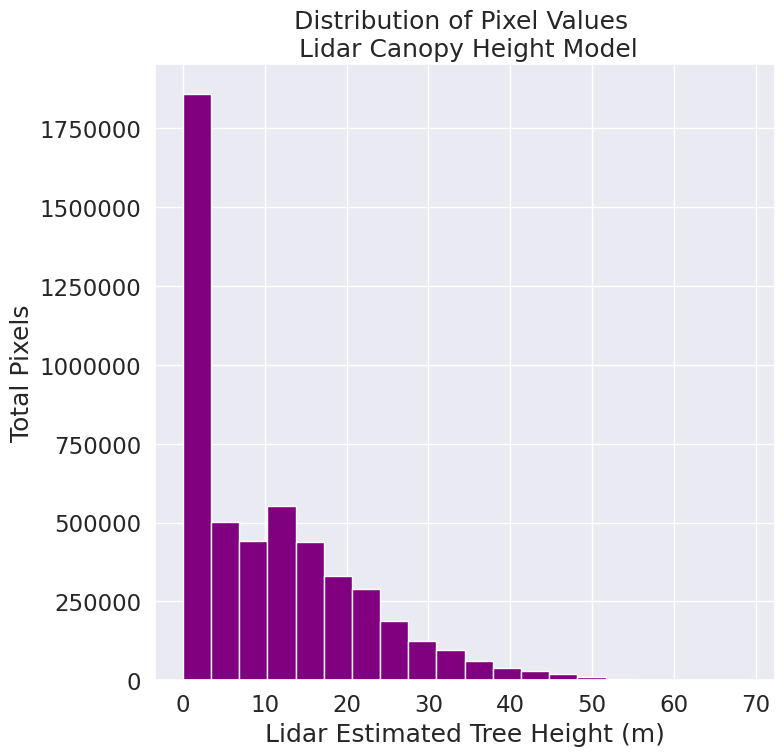

In [12]:
#Fazer a mesma coisa que o outro só que com dados diferentes, vamos lá
#PS: Não vou mudar os nomes pq vai em dar trabalho rsrsr
# Load & plot the data
sjer_lidar_chm_path = os.path.join("/california",
                                   "neon-soap-site",
                                   "2013",
                                   "lidar",
                                   "SOAP_lidarCHM.tif")

# open data
sjer_chm_data = rxr.open_rasterio(my_path + sjer_lidar_chm_path,
                                  masked = True).squeeze()
type(sjer_chm_data)
# Explore the data by plotting a histogram with earthpy
ax = ep.hist(sjer_chm_data.values,
             figsize=(8, 8),
             colors="purple",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation
ax[1].ticklabel_format(useOffset=False,
                       style='plain')

Mean: 10.309122
Max: 68.83
Min: 0.0
Mean: 15.372706
Max: 68.83
Min: 2.0


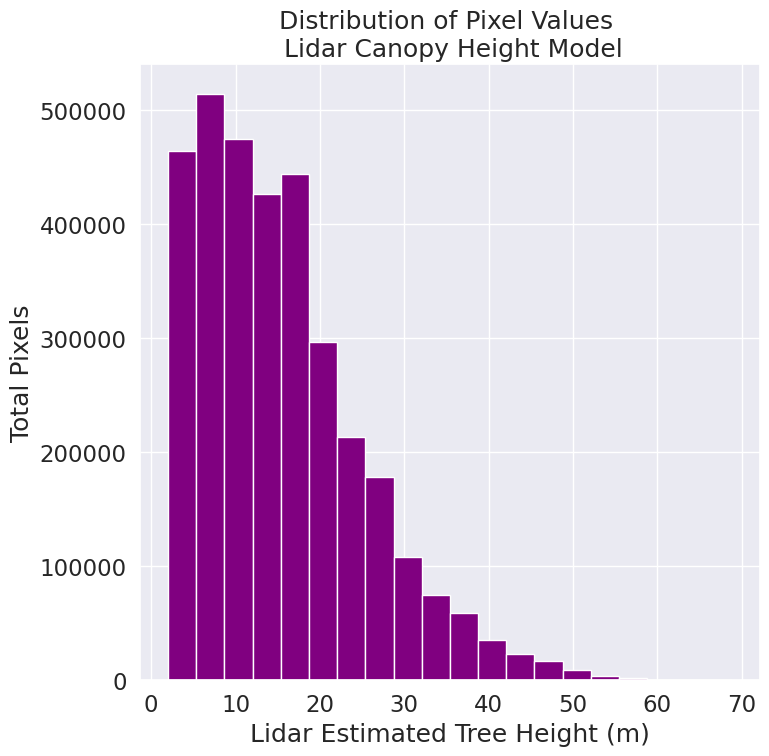

In [13]:
# EXPLORE: View summary statistics of canopy height model
# Notice the mean value with 0's included in the data
print('Mean:', sjer_chm_data.mean().values)
print('Max:', sjer_chm_data.max().values)
print('Min:', sjer_chm_data.min().values)
# CLEANUP: Set CHM values of 0 to NAN (no data or not a number)
sjer_chm_data_no_zeros = sjer_chm_data.where(sjer_chm_data != 0, np.nan)

# View summary statistics of canopy height model after cleaning up the data
print('Mean:', sjer_chm_data_no_zeros.mean().values)
print('Max:', sjer_chm_data_no_zeros.max().values)
print('Min:', sjer_chm_data_no_zeros.min().values)
# Explore the data by plotting a histogram with earthpy
ax = ep.hist(sjer_chm_data_no_zeros.values,
             figsize=(8, 8),
             colors="purple",
             xlabel="Lidar Estimated Tree Height (m)",
             ylabel="Total Pixels",
             title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation
ax[1].ticklabel_format(useOffset=False,
                       style='plain')

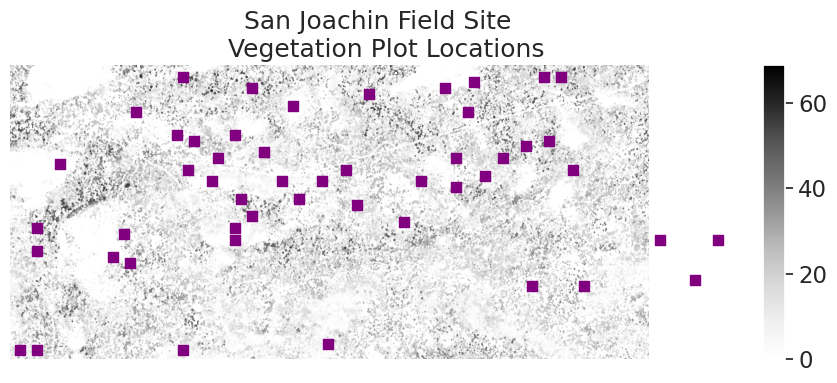

In [14]:
sjer_centroids_path = os.path.join("/california",
                                   "neon-soap-site",
                                   "vector_data",
                                   "SOAP_centroids.shp")

# load file
sjer_centroids_points = gpd.read_file(my_path + sjer_centroids_path)

# print type
type(sjer_centroids_points)
# Ensure this is a points layer as you think it is
sjer_centroids_points.geom_type.head()
fig, ax = plt.subplots(figsize=(10, 10))

# We plot with the zeros in the data so the CHM can be better represented visually
ep.plot_bands(sjer_chm_data,
              extent = plotting_extent(sjer_chm_data,
                                       sjer_chm_data.rio.transform()), # Set spatial extent
              cmap='Greys',
              title="San Joachin Field Site \n Vegetation Plot Locations",
              scale=False,
              ax=ax)

sjer_centroids_points.plot(ax=ax,
                          marker='s',
                          markersize=45,
                          color='purple')
ax.set_axis_off()
plt.show()

In [15]:
# Create a buffered polygon layer from your plot location points
sjer_plots_poly = sjer_centroids_points.copy()

# Buffer each point using a 20 meter circle radius
# and replace the point geometry with the new buffered geometry
sjer_plots_poly['geometry'] = sjer_centroids_points.geometry.buffer(20)
sjer_plots_poly.head()
# If the dir does not exist, create it
output_path = my_path + "/outputs"

if not os.path.isdir(output_path):
    os.mkdir(output_path)

# Export the buffered point layer as a shapefile to use in zonal stats
plot_buffer_path = os.path.join(output_path,
                                "plot_buffer_2.shp")

# save to file
sjer_plots_poly.to_file(plot_buffer_path)
# Rasterstats contains the zonalstatistics function
# that you will use to extract raster values
import rasterstats as rs
# Extract zonal stats
sjer_tree_heights = rs.zonal_stats(plot_buffer_path,
                                   sjer_chm_data_no_zeros.values,
                                   nodata=-999,
                                   affine=sjer_chm_data_no_zeros.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   stats="count min mean max median")

# View object type
type(sjer_tree_heights)

list

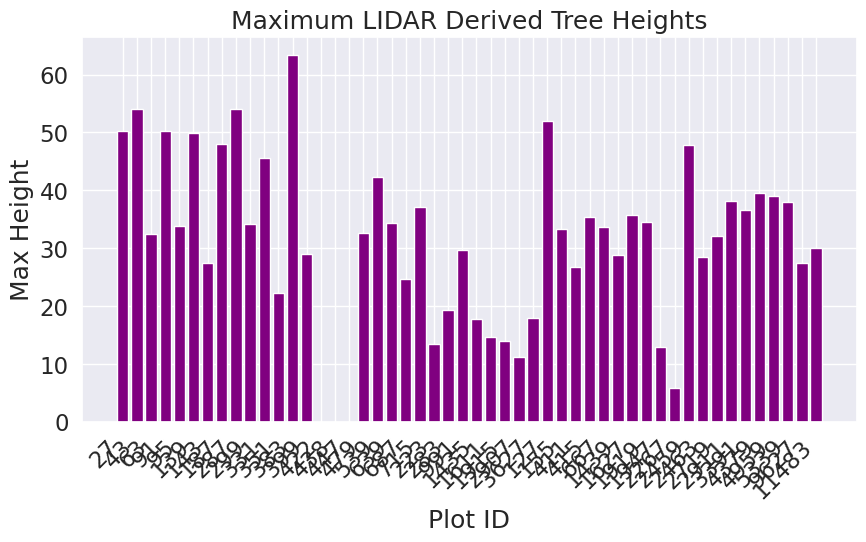

,ID,count,geometry,mini_raster_affine,mini_raster_array
0,27,822,"POLYGON ((297815.197 4101493.028, 297815.101 4...","(1.0, 0.0, 297775.0, 0.0, -1.0, 4101514.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."
1,43,1000,"POLYGON ((297065.197 4100713.028, 297065.101 4...","(1.0, 0.0, 297025.0, 0.0, -1.0, 4100734.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."
2,63,1082,"POLYGON ((299825.197 4101013.028, 299825.101 4...","(1.0, 0.0, 299785.0, 0.0, -1.0, 4101034.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."
3,91,1075,"POLYGON ((298175.197 4101433.028, 298175.101 4...","(1.0, 0.0, 298135.0, 0.0, -1.0, 4101454.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."
4,95,1138,"POLYGON ((298715.197 4100833.028, 298715.101 4...","(1.0, 0.0, 298675.0, 0.0, -1.0, 4100854.0, 0.0...","[[--, --, --, --, --, --, --, --, --, --, --, ..."


In [16]:
# Turn extracted data into a pandas geodataframe
sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)
sjer_lidar_height_df.head()
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(sjer_lidar_height_df['ID'],
       sjer_lidar_height_df['max'],
       color="purple")

ax.set(xlabel='Plot ID',
       ylabel='Max Height',
       title='Maximum LIDAR Derived Tree Heights')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
# Extract zonal stats but retain the individual pixel values
sjer_tree_heights_ras = rs.zonal_stats(plot_buffer_path,
                                      sjer_chm_data_no_zeros.values,
                                      nodata=-999,
                                      affine=sjer_chm_data_no_zeros.rio.transform(),
                                      geojson_out=True,
                                      raster_out=True,
                                      copy_properties=True,
                                      stats="count min mean max median")

# Convert to geodataframe
sjer_lidar_height_df_ras = gpd.GeoDataFrame.from_features(
    sjer_tree_heights_ras)

# View subset of the dataframe
sjer_lidar_height_df_ras[["ID",
                          "count",
                          "geometry",
                          "mini_raster_affine",
                          "mini_raster_array"]].head()

(50, 41, 41)

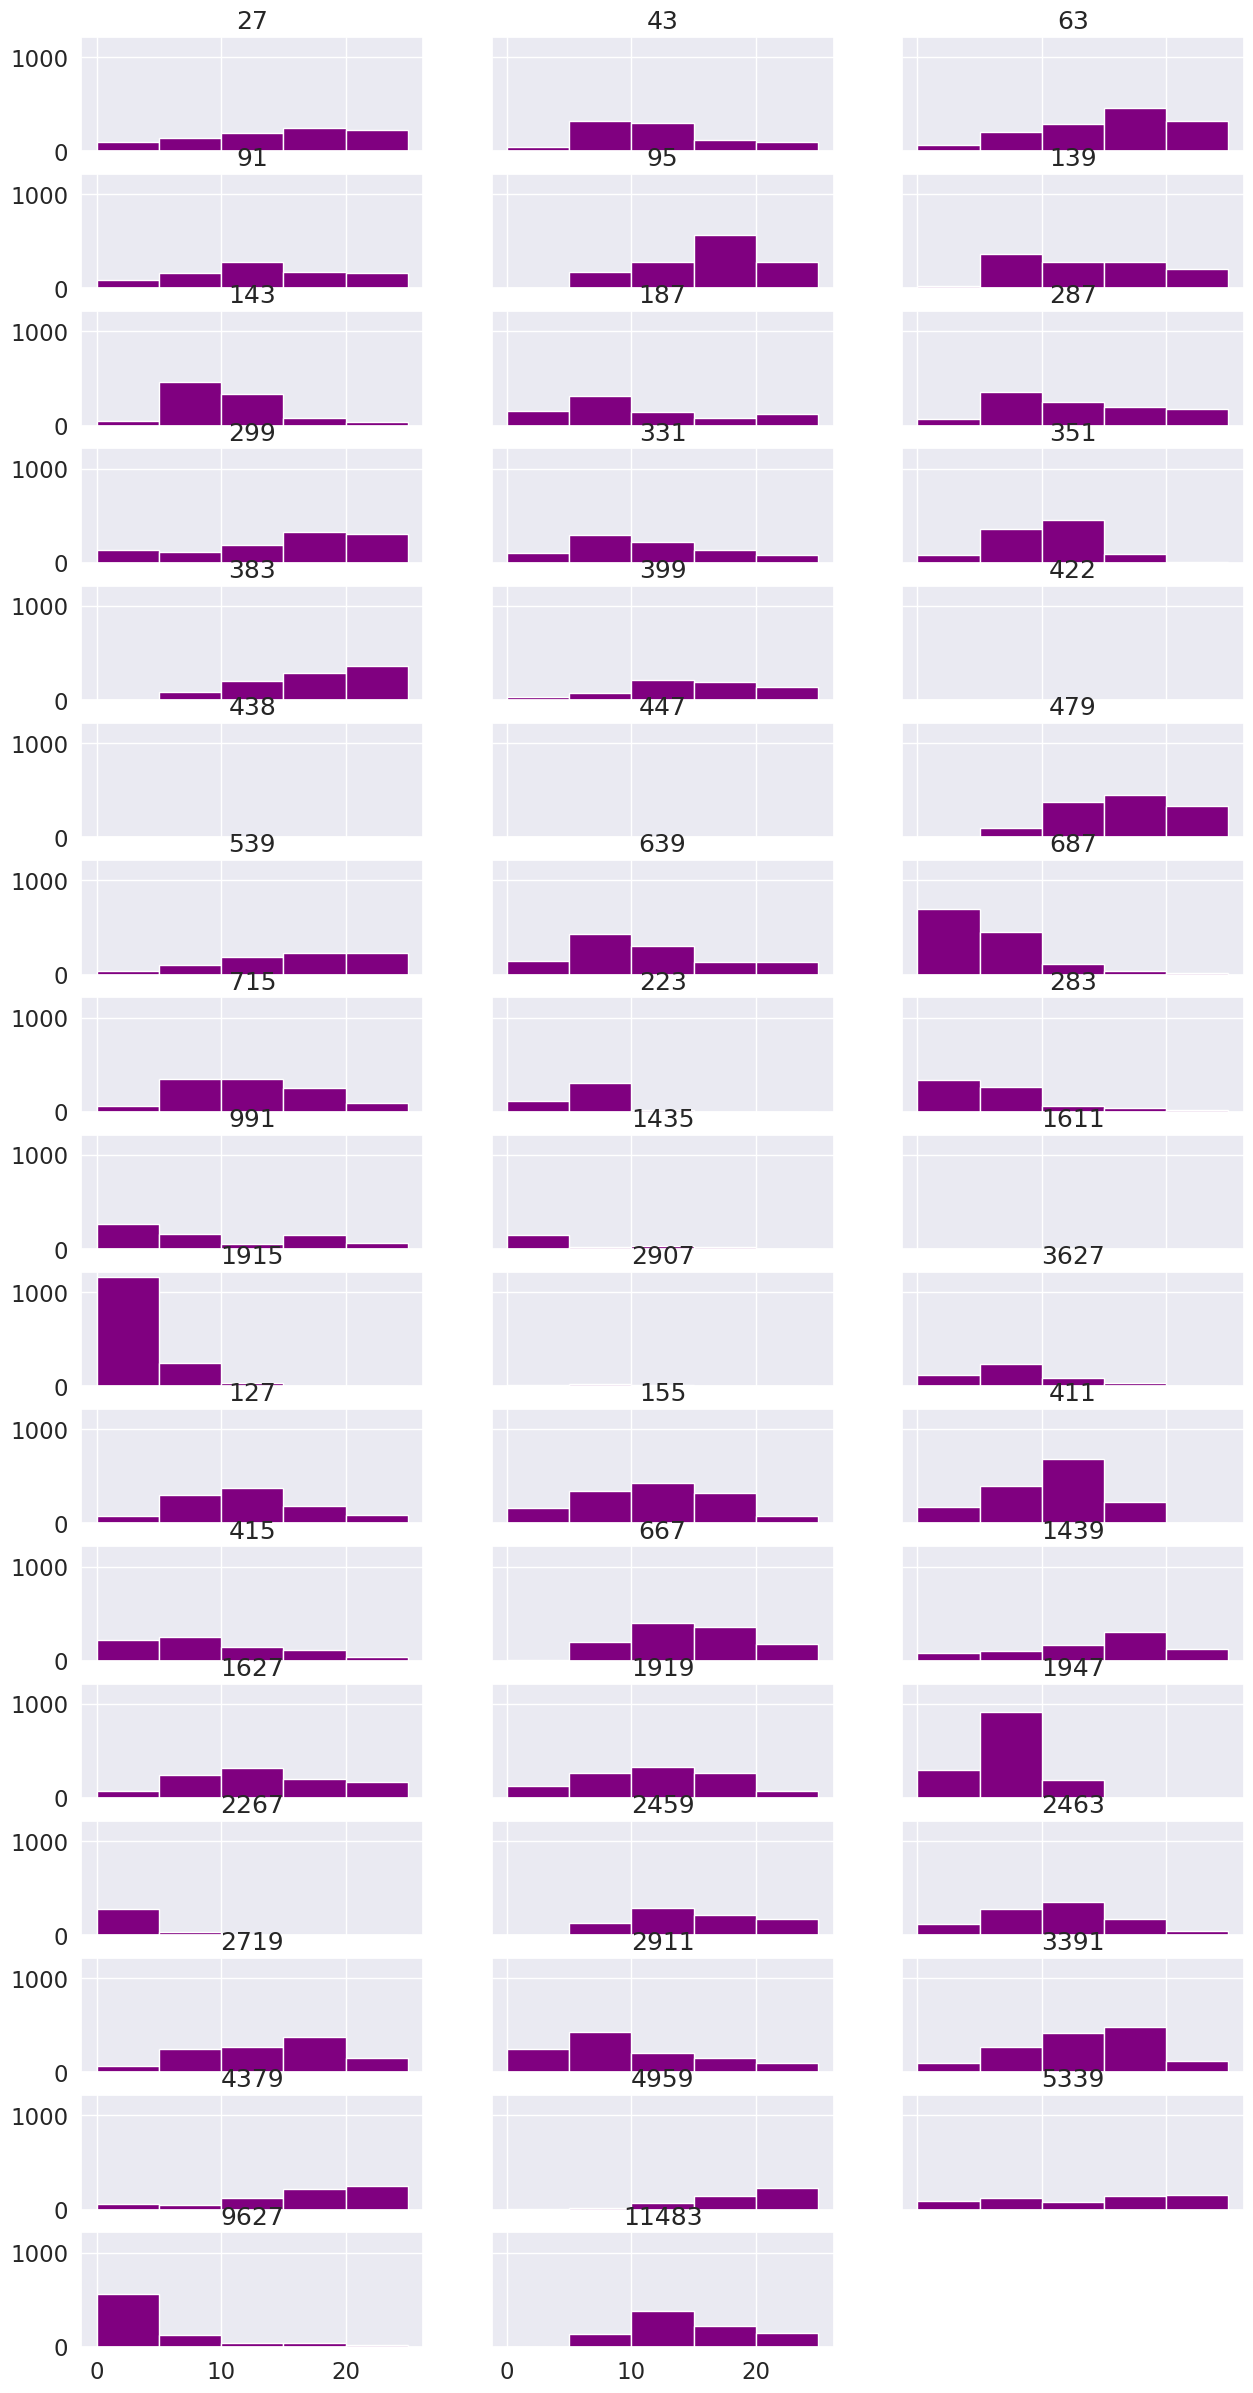

In [17]:
# Get list of sites
site_names = list(sjer_lidar_height_df_ras["ID"])

# Convert data in dataframe to a numpy array
arr = np.stack(sjer_lidar_height_df_ras["mini_raster_array"])

# Plot using earthpy
ep.hist(arr,
        bins=[0, 5, 10, 15, 20, 25],
        cols = 3,
        title=site_names,
        figsize=(15, 30))
arr.shape

In [18]:
# Extract zonal stats & create geodataframe
sjer_tree_heights = rs.zonal_stats(plot_buffer_path,
                                   sjer_chm_data.values,
                                   affine=sjer_chm_data.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   nodata=0,
                                   stats="count mean max")

# create geodataframe
sjer_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)
# Import & view insitu (field measured) data
path_insitu = os.path.join("/california",
                           "neon-soap-site",
                           "2013",
                           "insitu",
                           "veg-structure",
                           "D17_2013_SOAP_vegStr.csv")

# load data as pandas DataFrame
sjer_insitu_all = pd.read_csv(my_path + path_insitu)

# View columns in data
sjer_insitu_all.columns

Index(['siteid', 'sitename', 'plotid', 'easting', 'northing', 'taxonid',
       'scientificname', 'stemheight'],
      dtype='object')

In [19]:
sjer_insitu = sjer_insitu_all[["siteid",
                               "sitename",
                               "plotid",
                               "stemheight",
                               "scientificname"]]

sjer_insitu.head()
# summarize data
insitu_stem_ht = sjer_insitu.groupby('plotid').agg(['mean','max'])['stemheight']

# view first lines
insitu_stem_ht.head()
# Rename each column
insitu_stem_ht.rename(columns={'mean': 'insitu_mean',
                               'max': 'insitu_max'},
                      inplace = True)

# view first lines
insitu_stem_ht.head()
# Reset the index (plotid)
insitu_stem_ht = insitu_stem_ht.reset_index()
insitu_stem_ht.head()

<ipython-input-19-7e587fc31cbe>:9: FutureWarning: ['siteid', 'sitename', 'scientificname'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  insitu_stem_ht = sjer_insitu.groupby('plotid').agg(['mean','max'])['stemheight']


,plotid,insitu_mean,insitu_max
0,SOAP1343,2.112500,6.5
1,SOAP139,4.745902,120.0
2,SOAP143,2.530702,19.7
3,SOAP1515,1.776923,3.4
4,SOAP1563,1.071429,1.9


In [20]:
insitu_stem_ht.columns
sjer_lidar_height_df['ID'] = "SOAP" + sjer_lidar_height_df['ID'].astype(str)

In [21]:
sjer_lidar_height_df.head()

,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,max,mean,count
0,"POLYGON ((297815.197 4101493.028, 297815.101 4...",1,SOAP27,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",50.250000,20.455827,822
1,"POLYGON ((297065.197 4100713.028, 297065.101 4...",2,SOAP43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",54.099998,19.804080,1000
2,"POLYGON ((299825.197 4101013.028, 299825.101 4...",3,SOAP63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",32.480000,16.989834,1082
3,"POLYGON ((298175.197 4101433.028, 298175.101 4...",4,SOAP91,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",50.309998,21.980976,1075
4,"POLYGON ((298715.197 4100833.028, 298715.101 4...",5,SOAP95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",33.869999,17.412048,1138


In [22]:
# Rename columns so that we know which columns represent lidar values
sjer_lidar_height_df = sjer_lidar_height_df.rename(columns={'max': 'lidar_max',
                                                            'mean': 'lidar_mean',
                                                            'min': 'lidar_min'})

# Join lidar and human measured tree height data
sjer_final_height = sjer_lidar_height_df.merge(insitu_stem_ht,
                                               left_on='ID',
                                               right_on='plotid')

# view first lines
sjer_final_height.head()



,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,lidar_max,lidar_mean,count,plotid,insitu_mean,insitu_max
0,"POLYGON ((297065.197 4100713.028, 297065.101 4...",2,SOAP43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",54.099998,19.804080,1000,SOAP43,5.047000,51.1
1,"POLYGON ((299825.197 4101013.028, 299825.101 4...",3,SOAP63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",32.480000,16.989834,1082,SOAP63,9.232787,33.0
2,"POLYGON ((298715.197 4100833.028, 298715.101 4...",5,SOAP95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",33.869999,17.412048,1138,SOAP95,6.050943,28.1
3,"POLYGON ((297065.197 4100083.028, 297065.101 4...",6,SOAP139,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",49.919998,19.417840,1094,SOAP139,4.745902,120.0
4,"POLYGON ((299885.197 4100413.028, 299885.101 4...",7,SOAP143,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",27.340000,10.454653,778,SOAP143,2.530702,19.7


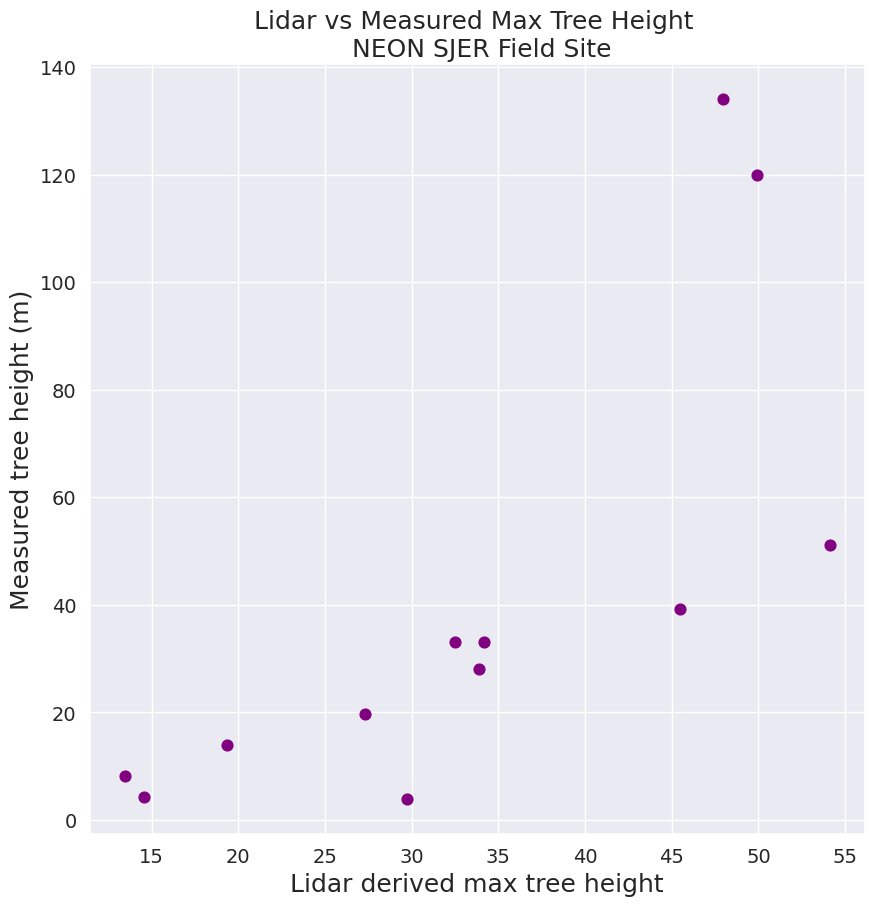

In [23]:
type(sjer_final_height)
# Convert to a dataframe so you can use standard pandas plotting
sjer_final_height_df = pd.DataFrame(sjer_final_height)

fig, ax = plt.subplots(figsize=(10, 10))

sjer_final_height_df.plot('lidar_max',
                          'insitu_max',
                          kind='scatter',
                          fontsize = 14,
                          s = 60,
                          color="purple",
                          ax=ax)

ax.set(xlabel="Lidar derived max tree height",
       ylabel="Measured tree height (m)",
       title="Lidar vs Measured Max Tree Height \n NEON SJER Field Site")

plt.show()

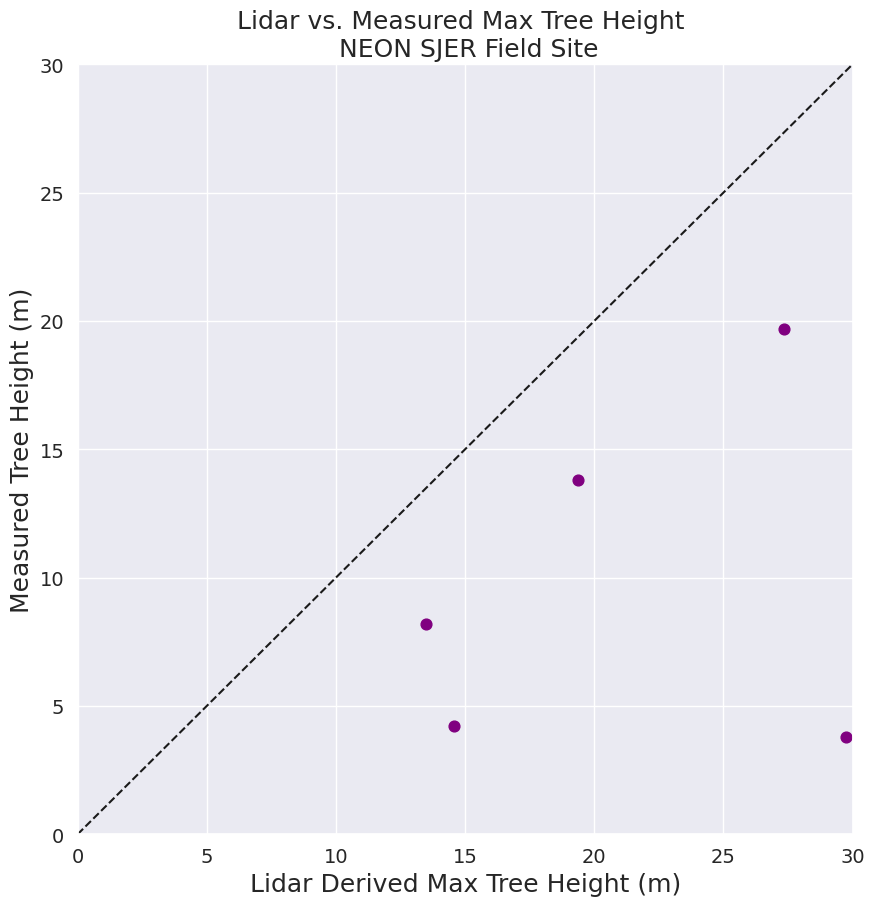

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_final_height_df.plot('lidar_max',
                          'insitu_max',
                          kind='scatter',
                          fontsize = 14,
                          s = 60,
                          color="purple",
                          ax=ax)

ax.set(xlabel="Lidar Derived Max Tree Height (m)",
       ylabel="Measured Tree Height (m)",
       title="Lidar vs. Measured Max Tree Height \n NEON SJER Field Site")

# Add 1:1 line
ax.plot((0,1), (0,1),
        transform = ax.transAxes,
        ls = '--',
        c = 'k')

# Adjust x and y axis limits
ax.set(xlim=[0, 30], ylim=[0, 30])
plt.show()

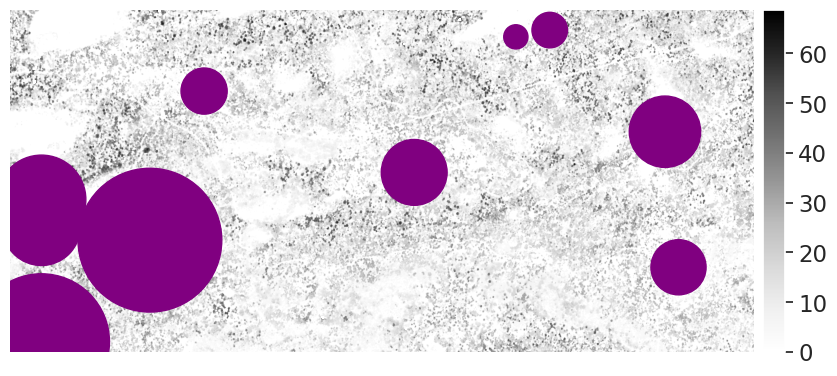

In [25]:
# Export the final data frame as a csv file
outpath = "/outputs/sjer-lidar-insitu-merge.csv"
sjer_final_height_df.to_csv(my_path + outpath)
type(sjer_final_height)
sjer_final_height.head()
# Convert the geometry column to contain points
sjer_final_height['geometry'] = sjer_final_height.centroid
sjer_final_height.head()
# look at insitu_max
sjer_final_height[['ID','insitu_max']]
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(sjer_chm_data,
              scale=False,
              extent = plotting_extent(sjer_chm_data,
                                       sjer_chm_data.rio.transform()),
              cmap='Greys',
              ax=ax)

# Plot centroids of each geometry as points so that you can control their size
sjer_final_height.centroid.plot(markersize=sjer_final_height['insitu_max'] * 80,
                                ax=ax,
                                marker='o',
                                c='purple')
ax.set_axis_off()
plt.show()

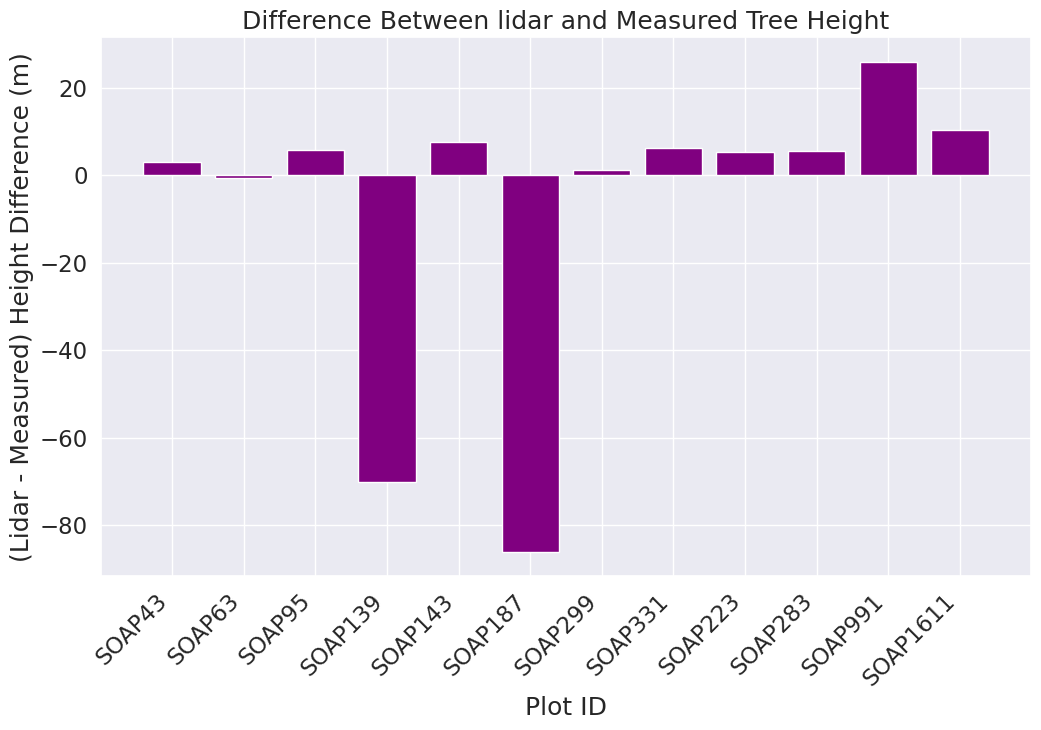

In [26]:
# Calculate difference
sjer_final_height['lidar_measured'] = sjer_final_height['lidar_max'] - \
    sjer_final_height['insitu_max']

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(sjer_final_height['plotid'],
       sjer_final_height['lidar_measured'],
       color="purple")

ax.set(xlabel='Plot ID',
       ylabel='(Lidar - Measured) Height Difference (m)',
       title='Difference Between lidar and Measured Tree Height')

plt.setp(ax.get_xticklabels(),
         rotation=45,
         horizontalalignment='right')
plt.show()

In [27]:
sjer_final_height.head()

,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,lidar_max,lidar_mean,count,plotid,insitu_mean,insitu_max,lidar_measured
0,POINT (297045.197 4100713.028),2,SOAP43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",54.099998,19.804080,1000,SOAP43,5.047000,51.1,2.999998
1,POINT (299805.197 4101013.028),3,SOAP63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",32.480000,16.989834,1082,SOAP63,9.232787,33.0,-0.520000
2,POINT (298695.197 4100833.028),5,SOAP95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",33.869999,17.412048,1138,SOAP95,6.050943,28.1,5.769999
3,POINT (297045.197 4100083.028),6,SOAP139,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",49.919998,19.417840,1094,SOAP139,4.745902,120.0,-70.080002
4,POINT (299865.197 4100413.028),7,SOAP143,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",27.340000,10.454653,778,SOAP143,2.530702,19.7,7.640000


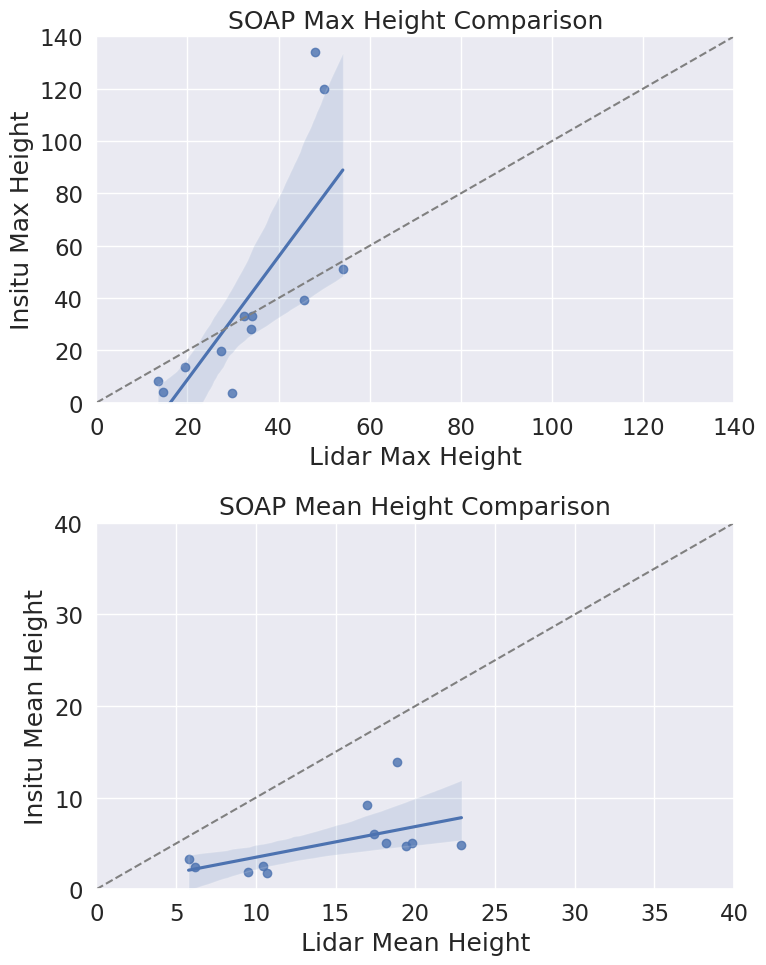

In [28]:
# Crie a figura com 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Configurações do subplot 1 - Max height
sns.regplot(x="lidar_max", y="insitu_max", data=sjer_final_height, ax=ax1)
ax1.plot([0, 140], [0, 140], linestyle="--", color="gray")  # Linha 1:1
ax1.set_xlim(0, 140)
ax1.set_ylim(0, 140)
ax1.set_xlabel("Lidar Max Height")
ax1.set_ylabel("Insitu Max Height")
ax1.set_title("SOAP Max Height Comparison")

# Configurações do subplot 2 - Mean height
sns.regplot(x="lidar_mean", y="insitu_mean", data=sjer_final_height, ax=ax2)
ax2.plot([0, 40], [0, 40], linestyle="--", color="gray")  # Linha 1:1
ax2.set_xlim(0, 40)
ax2.set_ylim(0, 40)
ax2.set_xlabel("Lidar Mean Height")
ax2.set_ylabel("Insitu Mean Height")
ax2.set_title("SOAP Mean Height Comparison")

# Ajuste de espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

Question 2. Of all four relationships that you plotted above, which site (SOAP or SJER) and metric (mean or max height) showed the strongest relationship?
A strong relationship is one that is closer to 1:1 in this case.

Add your answer in the markdown cell below. It can be short - 2-5 sentences. You do not need to perform any additional calculations. Consider the readings and the data and suggest why a particular metric might have a strong relationship.

YOUR ANSWER HERE:
A relação mais forte observada foi SJER com a média da altura das árvores


Question 3. List 2 reasons why lidar max height values may be larger than human measurements.
---
Add your answer to the markdown cell below.
YOUR ANSWER HERE:

----
1) Reflexões múltiplas (multiple reflections): As reflexões múltiplas ocorrem quando o pulso de laser lidar sofre reflexões em superfícies próximas, como ramos, troncos ou estruturas adjacentes, antes de retornar ao sensor. Essas reflexões múltiplas podem levar a uma superestimação da altura da árvore, pois os retornos adicionais são erroneamente considerados como sendo da copa da árvore, em vez de reflexões secundárias.


---
2) A medida lidar está sujeita a ocorrer sombeamento Sombreamento, ocultando  a parte inferior de uma copa de árvore ou a base do tronco é obscurecida por outras árvores próximas, estruturas ou objetos. Isso pode levar à falta de retornos de laser ou a retornos parciais, resultando em uma estimativa superestimada da altura da árvore.

Question 4. List 2 systematic sources of error could impact differences between lidar and measured tree height values ( 5 points)

----
1) Erros humanos, como por exemplo a subjetividade de onde é a altura máxima de uma árvore, tecnicamente isso é um padrão fractal que sempre terá um erro embutido
2) Erros de calibração do equipamento lidar podem levar a leituras imprecisas das alturas das árvores.

Question 5. List 2 random sources of error that could impact differences between lidar and measured tree height values. (5 points)
Add your answer to the markdown cell below. Note that you can provide sources of random error for lidar OR insitu measurements. You only need two total examples.

---

1) Variações na densidade de pontos lidar podem levar a estimativas imprecisas da altura das árvores, especialmente em áreas com menor densidade de pontos.

---
2)Variações nas condições atmosféricas durante a coleta dos dados lidar, como presença de nuvens, névoa e ventos, podem afetar a precisão das medições de altura.